FFT vokal




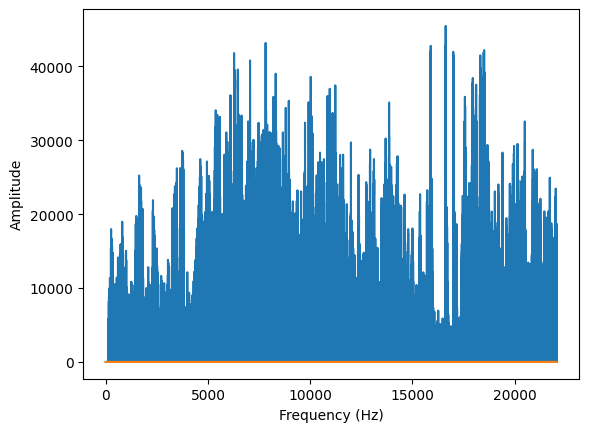

In [9]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Membaca file WAV
sample_rate, audio_data = wavfile.read('output2.wav')

# Mengambil panjang sinyal audio
signal_length = len(audio_data)

# Melakukan FFT pada sinyal audio
fft_result = np.fft.fft(audio_data)

# Menghasilkan array frekuensi yang sesuai dengan hasil FFT
frequency = np.fft.fftfreq(signal_length, 1 / sample_rate)

# Mengambil setengah bagian positif dari hasil FFT (asumsi sinyal simetris)
half_length = int(signal_length / 2)
fft_result = fft_result[:half_length]
frequency = frequency[:half_length]

# Menghitung amplitudo spektrum frekuensi
amplitude = np.abs(fft_result)

# Menampilkan hasil analisis suara menggunakan FFT
plt.plot(frequency, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


fft musik

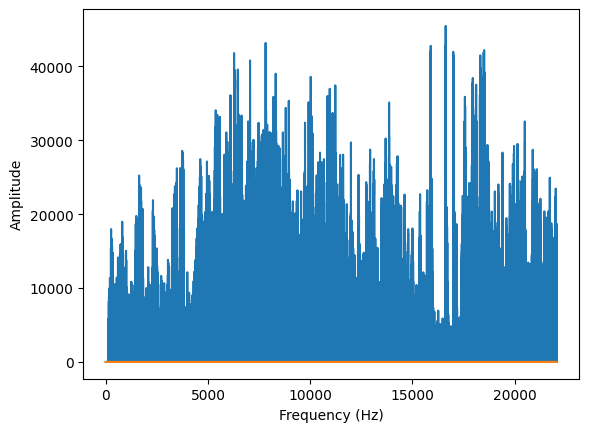

In [10]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Membaca file WAV
sample_rate, audio_data = wavfile.read('output2.wav')

# Mengambil panjang sinyal audio
signal_length = len(audio_data)

# Melakukan FFT pada sinyal audio
fft_result = np.fft.fft(audio_data)

# Menghasilkan array frekuensi yang sesuai dengan hasil FFT
frequency = np.fft.fftfreq(signal_length, 1 / sample_rate)

# Mengambil setengah bagian positif dari hasil FFT (asumsi sinyal simetris)
half_length = int(signal_length / 2)
fft_result = fft_result[:half_length]
frequency = frequency[:half_length]

# Menghitung amplitudo spektrum frekuensi
amplitude = np.abs(fft_result)

# Menampilkan hasil analisis suara menggunakan FFT
plt.plot(frequency, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


Tahap penggabungan suara



In [11]:
import soundfile as sf

# Membaca file audio pertama
audio1, sample_rate1 = sf.read('output2.wav')

# Membaca file audio kedua
audio2, sample_rate2 = sf.read('output2.wav')

# Memastikan kedua file memiliki sample rate yang sama
if sample_rate1 != sample_rate2:
    raise ValueError("Sample rate dari kedua file audio harus sama.")

# Memastikan kedua file memiliki panjang yang sama
if len(audio1) != len(audio2):
    raise ValueError("Panjang kedua file audio harus sama.")

# Menggabungkan kedua audio dengan operasi penjumlahan
combined_audio = audio1 + audio2

# Menyimpan audio hasil gabungan ke dalam file baru
sf.write('combined_audio.wav', combined_audio, sample_rate1)


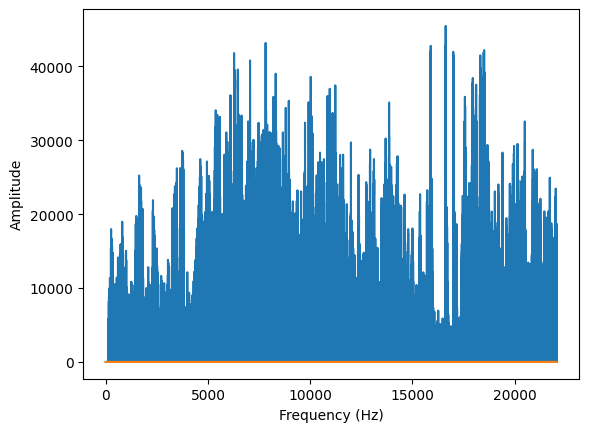

In [12]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Membaca file WAV
sample_rate, audio_data = wavfile.read('output2.wav')

# Mengambil panjang sinyal audio
signal_length = len(audio_data)

# Melakukan FFT pada sinyal audio
fft_result = np.fft.fft(audio_data)

# Menghasilkan array frekuensi yang sesuai dengan hasil FFT
frequency = np.fft.fftfreq(signal_length, 1 / sample_rate)

# Mengambil setengah bagian positif dari hasil FFT (asumsi sinyal simetris)
half_length = int(signal_length / 2)
fft_result = fft_result[:half_length]
frequency = frequency[:half_length]

# Menghitung amplitudo spektrum frekuensi
amplitude = np.abs(fft_result)

# Menampilkan hasil analisis suara menggunakan FFT
plt.plot(frequency, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


memisah
cara 1(fast ICA)

In [13]:
import numpy as np
from scipy import signal
from sklearn.decomposition import FastICA
import soundfile as sf

# Membaca file audio campuran
mixed_audio, sample_rate = sf.read('combined_audio.wav')

# Melakukan ICA pada audio campuran
ica = FastICA(n_components=2)
separated_audio = ica.fit_transform(mixed_audio)

# Menyimpan audio hasil pemisahan ke dalam file baru
sf.write('separated_audio1.wav', separated_audio[:, 0], sample_rate)  # Sumber suara 1
sf.write('separated_audio2.wav', separated_audio[:, 1], sample_rate)  # Sumber suara 2


C:\Users\rizky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


C:\Users\rizky\AppData\Local\Temp\ipykernel_27208\2755091349.py:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


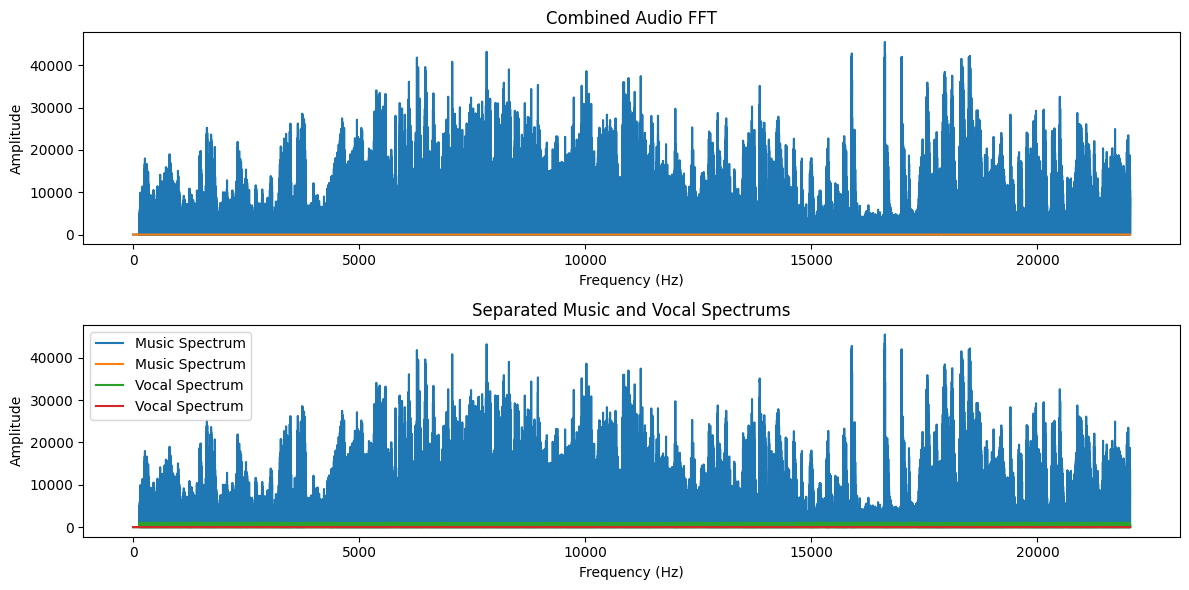

In [14]:
# Membaca file WAV
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
# import wave
import scipy.io.wavfile as wavfile
sample_rate, audio_data = wavfile.read('output2.wav')

# Mengambil panjang sinyal audio
signal_length = len(audio_data)

# Melakukan FFT pada sinyal audio
fft_result = np.fft.fft(audio_data)

# Menghasilkan array frekuensi yang sesuai dengan hasil FFT
frequency = np.fft.fftfreq(signal_length, 1 / sample_rate)

# Mengambil setengah bagian positif dari hasil FFT (asumsi sinyal simetris)
half_length = int(signal_length / 2)
fft_result = fft_result[:half_length]
frequency = frequency[:half_length]

# Menghitung amplitudo spektrum frekuensi
amplitude = np.abs(fft_result)

# Menentukan threshold untuk memisahkan komponen spektral
threshold = 1000  

# Memisahkan komponen spektral menjadi dua bagian (musik dan vokal)
music_spectrum = np.where(amplitude > threshold, fft_result, 0)
vocal_spectrum = np.where(amplitude <= threshold, fft_result, 0)

# Melakukan inversi FFT untuk mendapatkan sinyal musik dan sinyal vokal
music_signal = np.fft.ifft(music_spectrum).real
vocal_signal = np.fft.ifft(vocal_spectrum).real

# Menampilkan hasil pemisahan suara menggunakan FFT
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequency, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Combined Audio FFT')
plt.subplot(2, 1, 2)
plt.plot(frequency, np.abs(music_spectrum), label='Music Spectrum')
plt.plot(frequency, np.abs(vocal_spectrum), label='Vocal Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Separated Music and Vocal Spectrums')
plt.legend()
plt.tight_layout()
plt.show()

# Menyimpan sinyal musik dan vokal ke file WAV
wavfile.write('music.wav', sample_rate, music_signal.astype(np.int16))
wavfile.write('vocal.wav', sample_rate, vocal_signal.astype(np.int16))


MEMISAHKAN DENGAN CARA BAND PASS(MENYELEKSI FREKUENSI YANG AKAN DPILIH UNTK DI HAPUS)

In [15]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav

# Fungsi untuk menerapkan filter bandpass pada sinyal suara
def apply_bandpass_filter(data, sample_rate, lowcut, highcut):
    # Menentukan parameter filter
    order = 4  # Orde filter, angka bulat yang lebih besar dari 0
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist

    # Membuat filter bandpass
    b, a = signal.butter(order, [low, high], btype='band')

    # Menerapkan filter ke sinyal suara
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

# Membaca file audio
file_path = 'combined_audio.wav'  # Ganti dengan path file audio Anda
sample_rate, data = wav.read(file_path)

# Menentukan frekuensi cutoff
lowcut = 1000  # Frekuensi cutoff bawah, dalam Hz
highcut = 5000  # Frekuensi cutoff atas, dalam Hz

# Menerapkan filter bandpass pada sinyal audio
filtered_data = apply_bandpass_filter(data, sample_rate, lowcut, highcut)

# Menyimpan hasil filter ke file audio
filtered_file_path = 'filtered audio.wav'  # Ganti dengan path file audio hasil filter
wav.write(filtered_file_path, sample_rate, filtered_data.astype(np.int16))
